(206,)


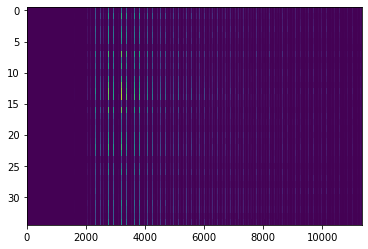


(30, 11330)
(30, 3)
Gominy    13.885693
Tyr        0.583311
Trp        0.069232
dtype: float64
{'copy': True, 'max_iter': 10000, 'n_components': 5, 'scale': True, 'tol': 1e-07}
Правильность на тестовом наборе: 0.42


In [123]:
from gzip import open # NB: overrides standard open()
import pickle as pkl
import tensorly as tl
from tensorly.base import tensor_to_vec,  partial_tensor_to_vec
import numpy as np
import pandas as pd
import warnings 
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

warnings.simplefilter('ignore') # отключим предупреждения Anaconda
Xdata_numpy = pkl.load(open('C:/Users/admin/Desktop/88/X.pkl.gz', 'rb'))
Ydata = pkl.load(open('C:/Users/admin/Desktop/88/y.pkl.gz', 'rb'))
print(Xdata_numpy['emission'].shape)
string_name=[]
string_name2=[]
k=0
#создаю пространство имён для развёрнутого тензора
for i in range(len(Xdata_numpy['emission'])):
    for j in range(len(Xdata_numpy['excitation'])):
        string_name+=[str(Xdata_numpy['emission'][i])+" x "+str(Xdata_numpy['excitation'][j])]
        string_name2+=[k]
        k+=1
#создаём пространство образцов
examples_names=[]
v=[]
for i in range(0,35):
    examples_names+=[str(i)]
    v+=[i]
Xdata_numpy['X'].shape = (Xdata_numpy['X'].shape[0], Xdata_numpy['X'].shape[1] * Xdata_numpy['X'].shape[2])
Xdata_numpy['X'][:,np.isnan(Xdata_numpy['X']).any(axis = 0)] = 0 # zero out any columns containing NaN

#рисуем новую матрицу
import matplotlib.pyplot as plt
plt.imshow(Xdata_numpy['X'],aspect="auto")
plt.show();
print()

X=pd.DataFrame(Xdata_numpy['X'],index=examples_names, columns=string_name)
#делим набор на обучающий и тестовый
X_train, X_test, y_train, y_test = train_test_split(
     X, Ydata, test_size=0.1428 
)
print(X_train.shape)
print(y_train.shape)
s=[]

#начинаем применять
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV


pls2 = PLSRegression()
parametrsNames={
    'copy': [True], 
    'max_iter': [10000], 
    'n_components': range(1,15), 
    'scale': [True], 
    'tol': [1e-04,1e-05,1e-06,1e-07]
}
gridCought=GridSearchCV(pls2, parametrsNames, cv=5)
gridCought.fit(X_train,y_train)
predictors=gridCought.predict(X_test)
s=np.mean((predictors-y_test)**2)

print(s)
print(gridCought.best_params_)
print("Правильность на тестовом наборе: {:.2f}".format(gridCought.score(X_test, y_test)))



In [124]:
print("Правильность на тестовом наборе: {:.2f}".format(gridCought.score(X_test, y_test)))

Правильность на тестовом наборе: 0.42


In [125]:
print("Наилучшее значение кросс-валидац. правильности: {:.2f}".format(gridCought.best_score_))

Наилучшее значение кросс-валидац. правильности: 0.68


In [126]:
results = pd.DataFrame(gridCought.cv_results_) 
# показываем первые 5 строк 
display(results.head()) 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_copy,param_max_iter,param_n_components,param_scale,param_tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.026373,0.004175,0.005013,0.000635,True,10000,1,True,0.0001,"{'copy': True, 'max_iter': 10000, 'n_component...",0.570990,0.746224,0.412662,0.401942,0.470672,0.520498,0.127803,37
1,0.028881,0.006150,0.005315,0.001404,True,10000,1,True,1e-05,"{'copy': True, 'max_iter': 10000, 'n_component...",0.569772,0.736031,0.407306,0.357752,0.479381,0.510048,0.133660,38
2,0.027159,0.005388,0.005065,0.000642,True,10000,1,True,1e-06,"{'copy': True, 'max_iter': 10000, 'n_component...",0.568953,0.733435,0.405650,0.344673,0.481953,0.506933,0.135912,39
3,0.029384,0.006985,0.005115,0.000665,True,10000,1,True,1e-07,"{'copy': True, 'max_iter': 10000, 'n_component...",0.568835,0.732233,0.405138,0.340428,0.482728,0.505872,0.136571,40
4,0.041224,0.006158,0.006519,0.001002,True,10000,2,True,0.0001,"{'copy': True, 'max_iter': 10000, 'n_component...",0.402958,0.832417,0.832148,0.654697,0.560354,0.656515,0.164518,13


In [127]:
scores = np.array(results.mean_test_score).reshape(100, 1) 
import mglearn 
# строим теплокарту средних значений правильности перекрестной проверки 
mglearn.tools.heatmap(scores, xlabel='n_components', xticklabels=parametrsNames['n_components'], 
                      ylabel='max_iter', yticklabels=parametrsNames['max_iter'], cmap="viridis")

ValueError: cannot reshape array of size 56 into shape (100,1)

In [128]:
from  sklearn.metrics import  mean_squared_error #среднеквадратичная ошибка
final_mse = mean_squared_error (y_test,  predictors) 
final_rmse  =  np.sqrt(final_mse)  
print(final_rmse)

2.201381052561823


In [129]:
type(y_test)

pandas.core.frame.DataFrame

In [130]:
print(predictors[:,0])
print(y_test.iloc[:,0])


[48.20753427 34.0298281  53.50931346 42.80107016 38.51297221]
0     45.446791
33    35.398815
29    46.322119
12    44.546831
17    36.226228
Name: Gominy, dtype: float64


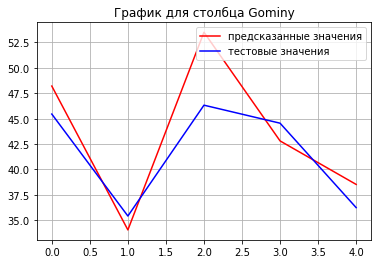

In [131]:
b=[]
for  i in range(0,5):
    b+=[i]
plt.plot(b,predictors[:,0],color="red",label="предсказанные значения")
plt.plot(b,y_test.iloc[:,0],color="blue", label="тестовые значения")
plt.legend()
plt.grid(True)
plt.title("График для столбца Gominy")
plt.show();


In [132]:
cvres  =  gridCought.cv_results_ 
for mean_score,  params  in zip (cvres [ "mean_test_score" ], cvres [ "params" ] ): 
    print (np.sqrt(-mean_score),  params)


nan {'copy': True, 'max_iter': 10000, 'n_components': 1, 'scale': True, 'tol': 0.0001}
nan {'copy': True, 'max_iter': 10000, 'n_components': 1, 'scale': True, 'tol': 1e-05}
nan {'copy': True, 'max_iter': 10000, 'n_components': 1, 'scale': True, 'tol': 1e-06}
nan {'copy': True, 'max_iter': 10000, 'n_components': 1, 'scale': True, 'tol': 1e-07}
nan {'copy': True, 'max_iter': 10000, 'n_components': 2, 'scale': True, 'tol': 0.0001}
nan {'copy': True, 'max_iter': 10000, 'n_components': 2, 'scale': True, 'tol': 1e-05}
nan {'copy': True, 'max_iter': 10000, 'n_components': 2, 'scale': True, 'tol': 1e-06}
nan {'copy': True, 'max_iter': 10000, 'n_components': 2, 'scale': True, 'tol': 1e-07}
nan {'copy': True, 'max_iter': 10000, 'n_components': 3, 'scale': True, 'tol': 0.0001}
nan {'copy': True, 'max_iter': 10000, 'n_components': 3, 'scale': True, 'tol': 1e-05}
nan {'copy': True, 'max_iter': 10000, 'n_components': 3, 'scale': True, 'tol': 1e-06}
nan {'copy': True, 'max_iter': 10000, 'n_components